In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# reading dataset

In [2]:
data=pd.read_csv(r'D:\ict\Wine_clust.csv')

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

# k means clustering

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


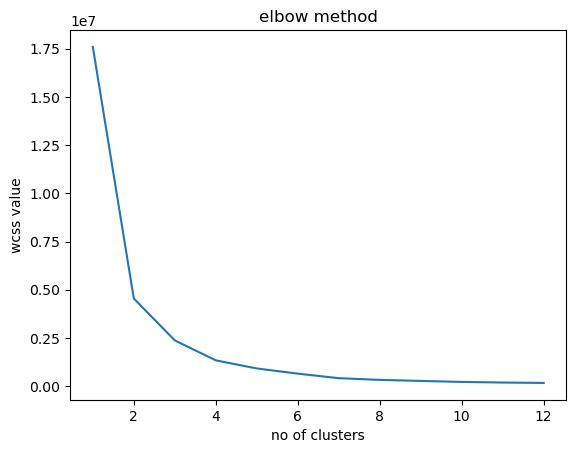

In [5]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,13):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,13),wcss)
plt.title('elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss value')
plt.show()

In [6]:
data1=data.iloc[:,[0,12]].values

In [7]:
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data1)

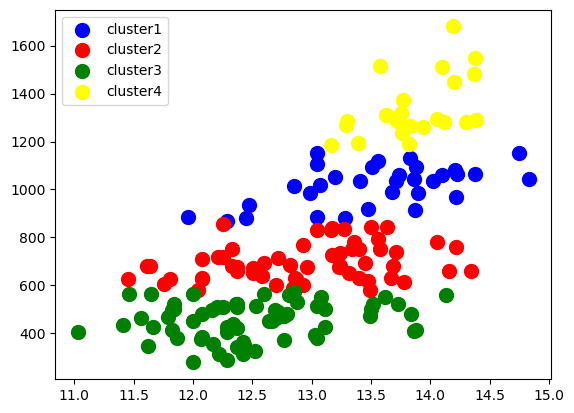

In [8]:
plt.scatter(data1[y_kmeans==0,0],data1[y_kmeans==0,1],s=100,c='blue',label='cluster1')
plt.scatter(data1[y_kmeans==1,0],data1[y_kmeans==1,1],s=100,c='red',label='cluster2')
plt.scatter(data1[y_kmeans==2,0],data1[y_kmeans==2,1],s=100,c='green',label='cluster3')
plt.scatter(data1[y_kmeans==3,0],data1[y_kmeans==3,1],s=100,c='yellow',label='cluster4')
plt.legend()
plt.show()

# agglomerative heirarchical clustering

In [9]:
import scipy.cluster.hierarchy as sch

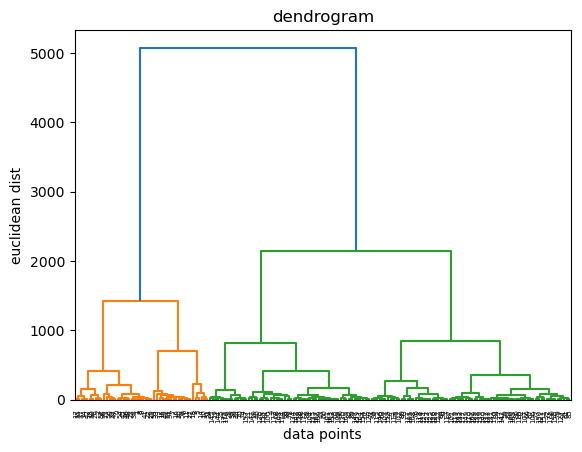

In [10]:
dendrogram=sch.dendrogram(sch.linkage(data,method='ward'))
plt.title('dendrogram')
plt.xlabel('data points')
plt.ylabel('euclidean dist')
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering
ahc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_ahc=ahc.fit_predict(data)

In [12]:
from sklearn.metrics import silhouette_score
sil_ahc=silhouette_score(data,y_ahc)
sil_ahc

0.6587292996216912

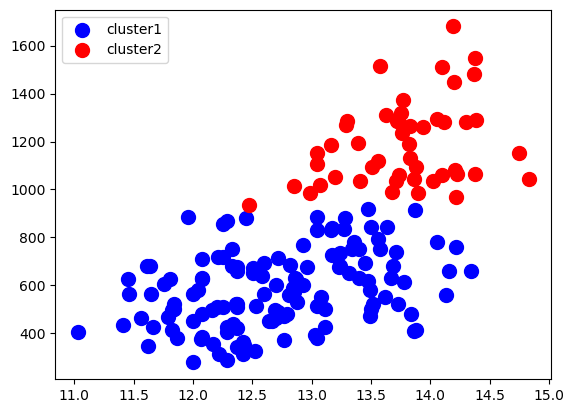

In [13]:
plt.scatter(data1[y_ahc==0,0],data1[y_ahc==0,1],s=100,c='blue',label='cluster1')
plt.scatter(data1[y_ahc==1,0],data1[y_ahc==1,1],s=100,c='red',label='cluster2')
plt.legend()
plt.show()

# DBSCAN clustering

In [71]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=4,min_samples=4,metric='euclidean')

In [72]:
model=db.fit(data1)

In [73]:
label=model.labels_

In [74]:
from sklearn import metrics
sample_cores=np.zeros_like(label,dtype=bool)
sample_cores[db.core_sample_indices_]=True
n_clusters=len(set(label))- (1 if -1 in label else 0)
print('No of clusters:',n_clusters)

No of clusters: 6


In [75]:
y_means = db.fit_predict(data1)

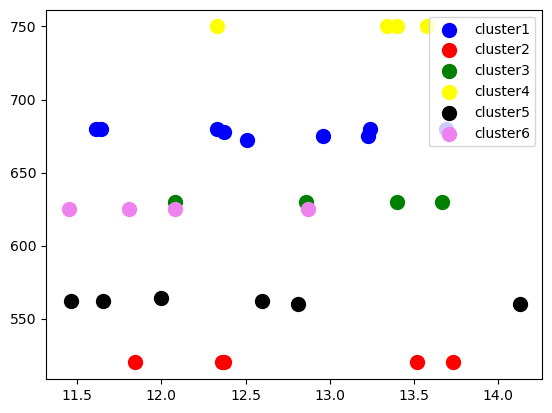

In [76]:
plt.scatter(data1[y_means==0,0],data1[y_means==0,1],s=100,c='blue',label='cluster1')
plt.scatter(data1[y_means==1,0],data1[y_means==1,1],s=100,c='red',label='cluster2')
plt.scatter(data1[y_means==2,0],data1[y_means==2,1],s=100,c='green',label='cluster3')
plt.scatter(data1[y_means==3,0],data1[y_means==3,1],s=100,c='yellow',label='cluster4')
plt.scatter(data1[y_means==4,0],data1[y_means==4,1],s=100,c='black',label='cluster5')
plt.scatter(data1[y_means==5,0],data1[y_means==5,1],s=100,c='violet',label='cluster6')
plt.legend()
plt.show()
